In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
from pprint import pprint
import glob

In [3]:
images_path=glob.glob('camera_cal/calibration*.jpg')
# plt.imshow(img)
def calibrate_camera(images_path,nx=9,ny=6):
    objpoints=[]
    imgpoints=[]
    # x=objp[:,:2]
    objp=np.zeros((ny*nx,3),np.float32)
    objp[:,:2]=np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    for image in images_path:
        img=mpimg.imread(image)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret,corners=cv2.findChessboardCorners(gray,(nx,ny),None)
        if ret==True:
            imgpoints.append(corners)
            objpoints.append(objp)
            cr_image=cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
            filename=image.split('\\')[-1]
#             print(filename)
            cv2.imwrite('output_corner/'+filename+'.jpg',img)
    return imgpoints,objpoints

In [4]:
# objpoints=[]
# imgpoints=[]
# nx=6
# ny=8
# # x=objp[:,:2]
# objp=np.zeros((6*8,3),np.float32)
# objp[:,:2]=np.mgrid[0:8,0:6].T.reshape(-1,2)
# # pprint(objp.shape)
# # print(objp)
# # print(x.shape)
# # print(np.mgrid[0:8,0:6])
# # print("----------")
# # print(np.mgrid[0:8,0:6].T)
# # print("----------")
# # print(np.mgrid[0:8,0:6].T.reshape(-1,2))
imgpoints,objpoints=calibrate_camera(images_path)
img=mpimg.imread(images_path[0])
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)



(720, 1280)


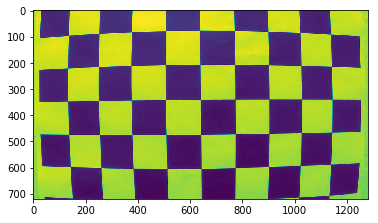

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
print(gray.shape)


In [6]:
ret,corners=cv2.findChessboardCorners(gray,(8,6),None)
if ret==True:
    imgpoints.append(corners)
    objpoints.append(objp)
#     img=cv2.drawChessboardCorners(img,(8,6),corners,ret)
    plt.imshow(img)
    print("Done")
print("Done end")

Done end


In [7]:
img_size = (gray.shape[1], gray.shape[0])
offset=100

src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
dst = np.float32([[offset, offset], [img_size[0]-offset, offset], \
                                     [img_size[0]-offset, img_size[1]-offset], \
                                     [offset, img_size[1]-offset]])\

TypeError: 'NoneType' object is not subscriptable

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [ ]:
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)

In [ ]:
print(gray.shape)
print(gray.shape[::-1])
print(img.shape)
print(img.shape[1::-1])

In [ ]:
img=mpimg.imread("frames/frame63.jpg")
plt.imshow(img)
print(img.shape)
# plt.plot(415,350,'.')  #top left
# plt.plot(550,350,'.') #top right
# plt.plot(200,500,'.') #bottom left
# plt.plot(785,500,'.') ##bottom right
plt.plot(580,480,'.')  #top left
plt.plot(770,480,'.') #top right
plt.plot(1050,640,'.') #bottom left
plt.plot(355,640,'.') ##bottom right

In [ ]:

def getperspective(img,src,dst):
    img_size=(img.shape[1],img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size)
    return warped
        # Warp the image using OpenCV warpPerspective()

# src = np.float32([[415,350],[550,350],[785,500],[200,500]])
# dst = np.float32([[100,50], [840,50],[820,540],[100,540]])
src = np.float32([[580,480],[770,480],[1050,640],[355,640]])
dst = np.float32([[80,0], [1200,0],[1200,700],[100,700]])
warper=getperspective(img,src,dst)
plt.imshow(warper)
plt.plot(100,50,'.')  #top left
plt.plot(1200,50,'*') #top right
plt.plot(1200,540,'*') #bottom right
plt.plot(100,540,'.') #bottom left

In [ ]:
plt.imshow(undist)

In [ ]:
img=mpimg.imread("solidWhiteRight.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")

943.0


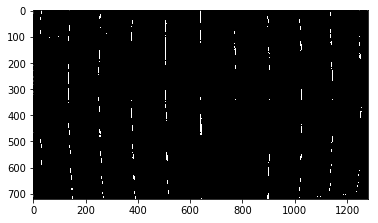

In [8]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobelx = np.absolute(sobelx)
print(np.max(abs_sobelx))
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

In [9]:
warper=getperspective(sxbinary,src,dst)
plt.imshow(warper,cmap='gray')

NameError: name 'getperspective' is not defined

In [10]:
#Gradient explanation

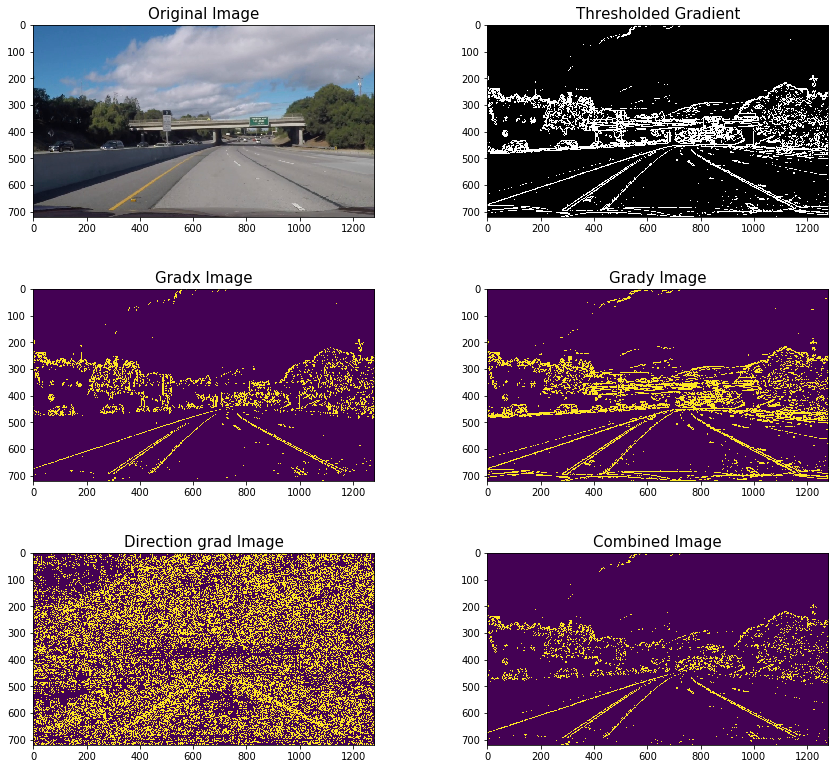

In [37]:
image=mpimg.imread("frames/frame99.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
def abs_sobel_thresh(img, orient='x',sobel_kernel=3, thresh=(0,255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0,sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1,sobel_kernel))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output


def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(10, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(10, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(10, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

f, ([[ax1, ax2],[ax3,ax4],[ax5,ax6]]) = plt.subplots(3, 2, figsize=(12, 5))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=15)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=15)
ax3.imshow(gradx)
ax3.set_title('Gradx Image', fontsize=15)
ax4.imshow(grady)
ax4.set_title('Grady Image', fontsize=15)
ax5.imshow(dir_binary)
ax5.set_title('Direction grad Image', fontsize=15)
ax6.imshow(combined)
ax6.set_title('Combined Image', fontsize=15)
plt.subplots_adjust(left=0., right=1, top=2, bottom=0.)
# plt.imshow(dir_binary)

In [38]:
############################################# Color spaces#####################################################

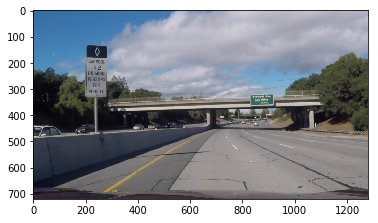

In [28]:
image=mpimg.imread("frames/frame129.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image,cmap='gray')

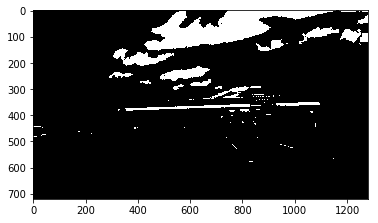

In [29]:

def gray_binary(image,thresh=(180,250)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    binary = np.zeros_like(gray)
    binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
    return binary

gb_img=gray_binary(image,(180,250))
plt.imshow(gb_img,cmap='gray')



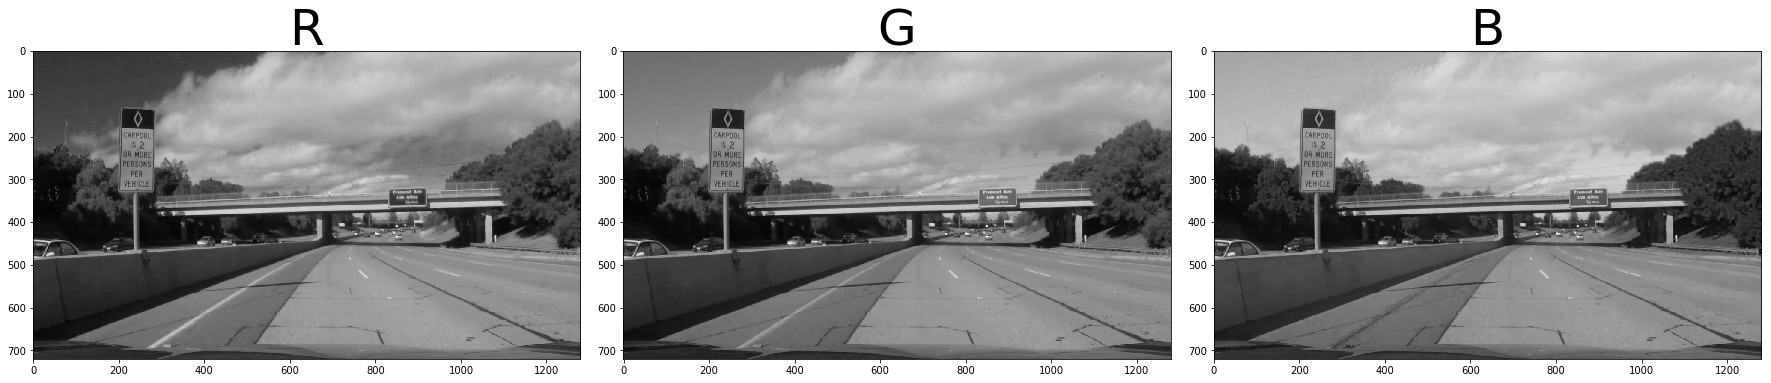

In [30]:
#RGB Channels
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
f, [ax1, ax2,ax3] = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(R,cmap='gray')
ax1.set_title('R', fontsize=50)
ax2.imshow(G,cmap='gray')
ax2.set_title('G', fontsize=50)
ax3.imshow(B,cmap='gray')
ax3.set_title('B', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=2, bottom=0.)

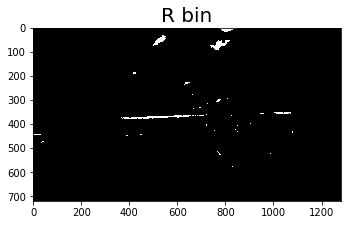

In [31]:
thresh = (200, 255)
r_binary = np.zeros_like(R)
r_binary[(R > thresh[0]) & (R <= thresh[1])] = 1
f, ax1 = plt.subplots(1, 1, figsize=(5, 9))
f.tight_layout()
ax1.imshow(r_binary,cmap='gray')
ax1.set_title('R bin', fontsize=20)

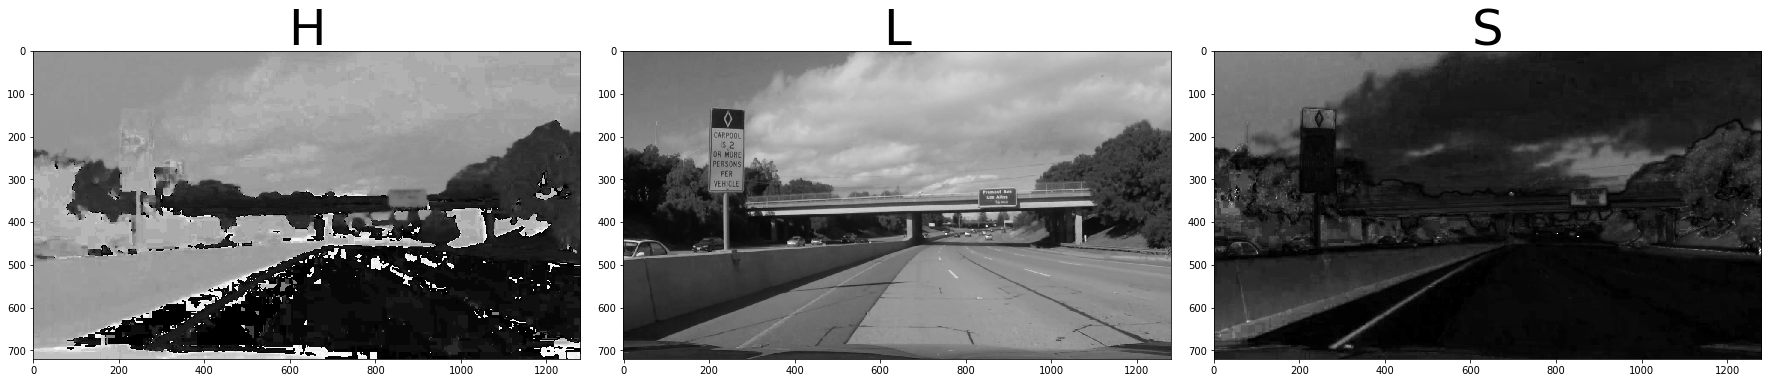

In [32]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
f, [ax1, ax2,ax3] = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H,cmap='gray')
ax1.set_title('H', fontsize=50)
ax2.imshow(L,cmap='gray')
ax2.set_title('L', fontsize=50)
ax3.imshow(S,cmap='gray')
ax3.set_title('S', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=2, bottom=0.)

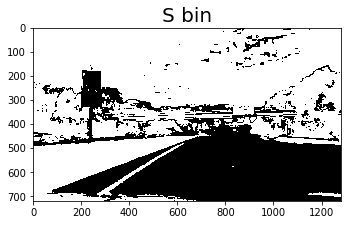

In [33]:
thresh = (20, 255)
s_binary = np.zeros_like(S)
s_binary[(S > thresh[0]) & (S <= thresh[1])] = 1
f, ax1 = plt.subplots(1, 1, figsize=(5, 9))
f.tight_layout()
ax1.imshow(s_binary,cmap='gray')
ax1.set_title('S bin', fontsize=20)

In [34]:
#function for s_binary
def s_binary_fun(img,thresh=(90,255)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    s_binary = np.zeros_like(S)
    s_binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    return s_binary
    
    

In [35]:
#*********************************************combining color and gradient*******************************************

(720, 1280, 3)


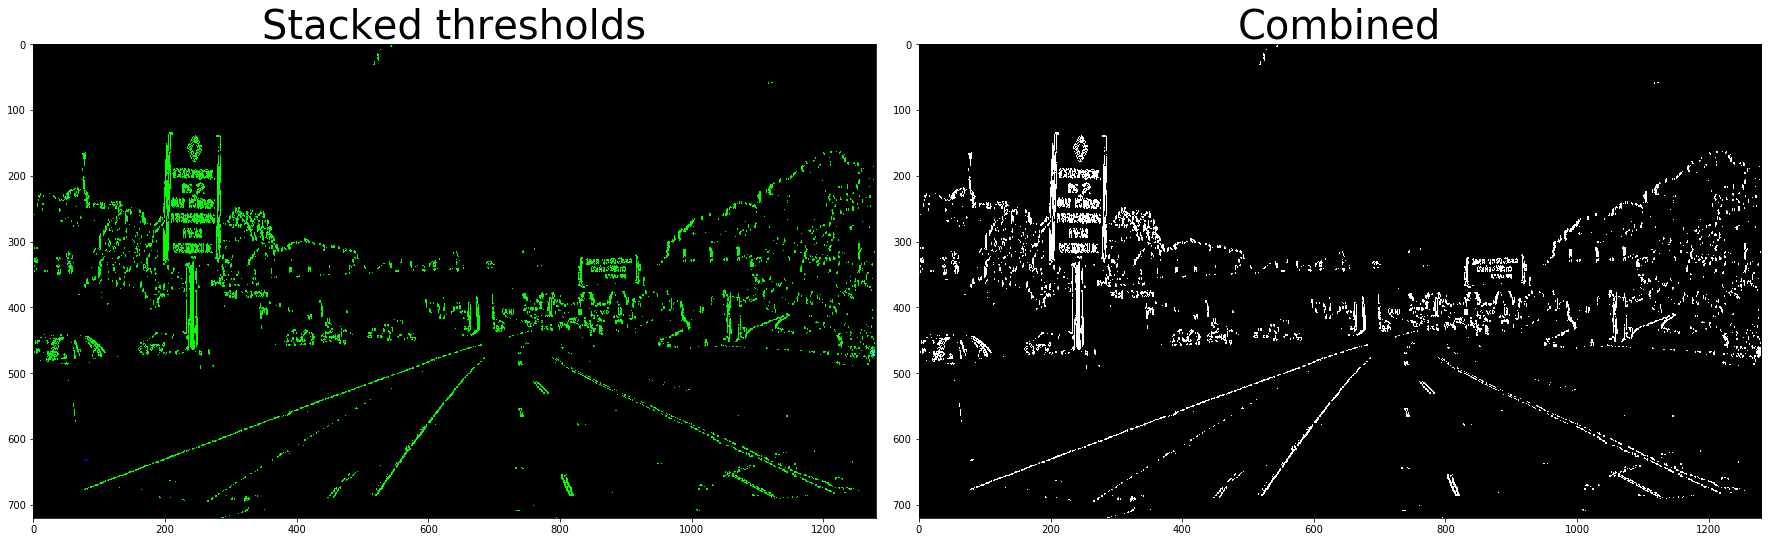

In [36]:
image=mpimg.imread("frames/frame129.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gradx_img = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100)) # calculate gradient

s_b_img=s_binary_fun(img,(170,255))

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(gradx_img), gradx_img, s_b_img)) * 255
print(color_binary.shape)

# Combine the two binary thresholds
combined_binary = np.zeros_like(gradx_img)
combined_binary[(s_b_img == 1) | (gradx_img == 1)] = 1

#Green is gradient threshold and blue is color channel threshold

f, [ax1, ax2] = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(color_binary,cmap='gray')
ax1.set_title('Stacked thresholds', fontsize=40)
ax2.imshow(combined_binary,cmap='gray')
ax2.set_title('Combined', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=2, bottom=0.)

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
Visualization
At this point, you're done! But here is how you can visualize the result as well:

# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

SyntaxError: invalid syntax (<ipython-input-28-fc3485145546>, line 77)